### Importing Libraries

In [12]:
import os
import csv
import pandas as pd
import pprint
import statistics
import re
from tabulate import tabulate

### Checking the current working directory

In [178]:
!pwd

/c/Users/nikit/OneDrive - Agiloft/Nikita/AI/Python Scripts


### Setting the directory that contains the files

Note I have moved all the 3 .txt (i.e. debug.txt, score.txt, conf_matrix.txt) files from model folder to the folder which is one step above the model folder in the directory (screenshot of how it should it look after moving the files).<br>
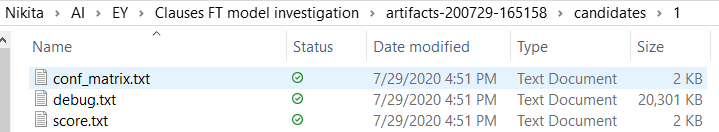
<b>Make sure to do the same to run the the following lines of code.<b>

In [1]:
directory = 'C:/Users/nikit/OneDrive - Agiloft/Nikita/AI/EY/Clauses FT model investigation/artifacts-200729-165158/candidates'

### Splits contains information about number of splits cross-validation has to go through

In [4]:
splits = os.listdir(directory)
print(splits)

['1', '2', '3']


### Functions used

In [22]:
def convert_to_numeric(df):
    """
    This function convert column of the dataframe from string datatype to numeric datatype
    """
    columns = df.columns[1:]
    for col in columns:
        df[col]=pd.to_numeric(df[col])

In [270]:
def rename_col_to_label(df):
    """
    This function renames the first column of the dataframe to 'Label'
    """
    col_to_rename = df.columns[0]
    df.rename(columns = {col_to_rename:'Label'},inplace = True)

# Table of Contents

<a href ='#score.txt'>Combining score.txt files from each split</a> <br/>
<a href ='#conf_matrix.txt'>Combining conf_matrix.txt from each split into one</a> <br/>
<a href = '#debug.txt'>Combining the debug.txt file from all splits into one</a>

<a id = 'score.txt'></a>
## Combining score.txt files from each split

In [24]:
### Following block of code converts score.txt file into individual dataframes
for split in splits:
    print(split)
    with open (directory+"/"+split+'/score.txt','r', encoding = 'utf-8') as score:
        text = score.read().splitlines()
        score_txt = csv.reader(text, delimiter = '\t')
        iteration = []
        for row in score_txt:
            iteration.append(row)
        exec('df_{}_score_100 = pd.DataFrame(iteration[1:], columns = iteration[0])'.format(split))
        #you may uncomment below line of code to allow Python to save each score.txt file from each split into its individual .csv file
#         df.to_csv('score_iteration_'+split+'.csv', index = False)  

1
2
3


In [25]:
# printing each individual score dataframes created 
print('-----------DF_1------------------')
# print(df_1.head())
print(tabulate(df_1_score_100.tail(),headers=['id','label','Accuracy','Recall','F1','Support']))
print('\n')
print('-----------DF_2------------------')
# print(df_2.head())
print(tabulate(df_2_score_100.tail(),headers=['id','label','Accuracy','Recall','F1','Support']))
print('\n')
print('-----------DF_3------------------')
# print(df_3.head())
print(tabulate(df_3_score_100.tail(),headers=['id','label','Accuracy','Recall','F1','Support']))

-----------DF_1------------------
  id  label                                 Accuracy    Recall          F1    Support
----  ----------------------------------  ----------  --------  ----------  ---------
  12  Expiration Event                    0.15        0.375     0.214286            8
  13  Contract or Amendment Value (Text)  0.00373134  0.09375   0.00717703         32
  14  Milestone Payment Schedule          0.0487106   0.653846  0.0906667          26
  15
  16  Total                               0.958513    0.958513  0.958513       165569


-----------DF_2------------------
  id  label                                 Accuracy    Recall         F1    Support
----  ----------------------------------  ----------  --------  ---------  ---------
  12  Expiration Event                     0.0175439  0.125     0.0307692          8
  13  Contract or Amendment Value (Text)   0.0251799  0.411765  0.0474576         17
  14  Milestone Payment Schedule           0          0         0    

In [28]:
### Converting the datatypes of columns 'Accuracy', 'Recall', 'F1' and 'Support' from string to number
for split in splits:
    print(split)
    exec('convert_to_numeric(df_{}_score_100)'.format(split))

1
2
3


In [30]:
type(df_1_score_100['Accuracy'][0])

numpy.float64

### Creating final dataframe that will contain score from all the dataframes

In [185]:
final_df_score_100=pd.DataFrame()

In [ ]:
final_df_score_100['Label'] = df_1_score_100['Label'].copy()

<b> NOTE: In below block of code, if there are more than 3 splits then add those dataframes as well.</b>

In [191]:
Accuracy_mean= pd.concat([df_1_100, df_2_100, df_3_100]).groupby('Label')['Accuracy'].mean()

Recall_mean= pd.concat([df_1_100, df_2_100, df_3_100]).groupby('Label')['Recall'].mean()

F1_mean = pd.concat([df_1_100, df_2_100, df_3_100]).groupby('Label')['F1'].mean()

Support_sum = pd.concat([df_1_100, df_2_100, df_3_100]).groupby('Label')['Support'].sum()

In [193]:
final_df_score_100 = final_df_score_100.join(Accuracy_mean,on='Label')
final_df_score_100 = final_df_score_100.join(Recall_mean,on='Label')
final_df_score_100 = final_df_score_100.join(F1_mean,on='Label')
final_df_score_100 = final_df_score_100.join(Support_sum,on='Label')

In [194]:
# dropping blank row
final_df_score_100.dropna(inplace=True)

In [251]:
final_df_score_100

,Label,Accuracy,Recall,F1,Support
0,none,0.992309,0.976632,0.984377,560438.0
1,Purpose,0.564182,0.767303,0.638379,1672.0
2,Introduction (Text),0.648478,0.781654,0.706980,2438.0
3,Payment Terms (Text),0.340090,0.649899,0.433385,1329.0
4,Limitation of Liability (Text),0.769119,0.846073,0.802440,9210.0
5,Assignment (Text),0.665096,0.769788,0.705331,2290.0
6,Past Due Remedies (Text),0.893052,0.841968,0.864047,3396.0
7,Term (Text),0.433692,0.637145,0.510946,1302.0
8,Advance Payment,0.675849,0.813175,0.706739,896.0
9,Title Transfer (Text),0.588226,0.761054,0.644166,591.0


In [ ]:
final_df_score_100.to_csv('final_score_100.csv',index = False)

<a id = 'conf_matrix.txt'></a>
## Combining conf_matrix.txt from each split into one

In [218]:
### Following block of code converts conf_matrix.txt file into individual dataframes
for split in splits:
    print(split)
    with open (directory+"/"+split+'/conf_matrix.txt','r', encoding = 'utf-8') as cm:
        text = cm.read().splitlines()
        conf_txt = csv.reader(text, delimiter = '\t')
        iteration = []
        for row in conf_txt:
            iteration.append(row)
        exec('df_cm_{}_100 = pd.DataFrame(iteration[1:], columns = iteration[0])'.format(split))
        #you may uncomment below line of code to allow Python to save each conf_matrix.txt file from each split into its individual csv file.
#         df.to_csv('conf_matrix_iteration_'+split+'.csv', index = False)

1
2
3


In [221]:
## Converting datatype of columns 'Accuracy', 'Recall', 'F1' and 'Support' from string to numeric.
for split in splits:
    print(split)
    exec('convert_to_numeric(df_cm_{}_100)'.format(split))

In [229]:
# renaming first column of each dataframe to 'Label'
for split in splits:
    print(split)
    exec('rename_col_to_label(df_cm_{}_100)'.format(split))

In [233]:
df_cm_3_100

,Label,none,Introduction_(Text),Purpose,Payment_Terms_(Text),Term_(Text),Limitation_of_Liability_(Text),Assignment_(Text),Past_Due_Remedies_(Text),Advance_Payment,Termination_(Text),Title_Transfer_(Text),Contract_or_Amendment_Value_(Text),Protection_Period_Extension,Expiration_Event,Milestone_Payment_Schedule,Total
0,none,192955.0,334.0,165.0,498.0,411.0,425.0,185.0,90.0,19.0,223.0,48.0,317.0,106.0,20.0,34.0,195830.0
1,Introduction_(Text),199.0,598.0,8.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,810.0
2,Purpose,169.0,40.0,399.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,609.0
3,Payment_Terms_(Text),372.0,0.0,0.0,248.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,5.0,0.0,0.0,2.0,632.0
4,Term_(Text),112.0,2.0,0.0,0.0,263.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,4.0,0.0,386.0
5,Limitation_of_Liability_(Text),539.0,0.0,0.0,1.0,0.0,2265.0,0.0,0.0,0.0,2.0,0.0,23.0,0.0,0.0,0.0,2830.0
6,Assignment_(Text),231.0,0.0,2.0,0.0,1.0,0.0,584.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,845.0
7,Past_Due_Remedies_(Text),296.0,0.0,0.0,5.0,1.0,0.0,0.0,747.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1051.0
8,Advance_Payment,104.0,0.0,0.0,10.0,0.0,0.0,0.0,7.0,177.0,0.0,0.0,0.0,0.0,0.0,0.0,298.0
9,Termination_(Text),50.0,0.0,0.0,0.0,59.0,0.0,1.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,166.0


### Creating final dataframe that contains sum from all the confusion matrix

In [280]:
final_df_cm_100 = pd.DataFrame(pd.concat([df_cm_1_100, df_cm_2_100, df_cm_3_100]).groupby('Label').sum())

In [281]:
final_df_cm_100

,none,Purpose,Introduction_(Text),Payment_Terms_(Text),Limitation_of_Liability_(Text),Assignment_(Text),Past_Due_Remedies_(Text),Term_(Text),Advance_Payment,Title_Transfer_(Text),Termination_(Text),Protection_Period_Extension,Expiration_Event,Contract_or_Amendment_Value_(Text),Milestone_Payment_Schedule,Total
Label,,,,,,,,,,,,,,,,
Advance_Payment,150.0,0.0,0.0,11.0,0.0,0.0,13.0,0.0,722.0,0.0,0.0,0.0,0.0,0.0,0.0,896.0
Assignment_(Text),419.0,2.0,0.0,0.0,0.0,1754.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,107.0,0.0,2290.0
Contract_or_Amendment_Value_(Text),51.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,8.0,85.0
Expiration_Event,33.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,1.0,0.0,27.0,0.0,0.0,82.0
Introduction_(Text),457.0,37.0,1925.0,1.0,2.0,0.0,0.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2438.0
Limitation_of_Liability_(Text),1133.0,0.0,0.0,1.0,7820.0,3.0,0.0,0.0,143.0,2.0,2.0,0.0,0.0,103.0,3.0,9210.0
Milestone_Payment_Schedule,164.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,17.0,194.0
Past_Due_Remedies_(Text),433.0,3.0,0.0,8.0,2.0,0.0,2934.0,1.0,12.0,0.0,0.0,3.0,0.0,0.0,0.0,3396.0
Payment_Terms_(Text),511.0,0.0,0.0,791.0,0.0,0.0,4.0,1.0,10.0,1.0,0.0,0.0,0.0,7.0,4.0,1329.0


In [282]:
# sorting the columns alphabetically
final_df_cm_100=final_df_cm_100.reindex(sorted(final_df_cm_100.columns), axis=1)

In [283]:
final_df_cm_100.columns

Index(['Advance_Payment', 'Assignment_(Text)',
       'Contract_or_Amendment_Value_(Text)', 'Expiration_Event',
       'Introduction_(Text)', 'Limitation_of_Liability_(Text)',
       'Milestone_Payment_Schedule', 'Past_Due_Remedies_(Text)',
       'Payment_Terms_(Text)', 'Protection_Period_Extension', 'Purpose',
       'Term_(Text)', 'Termination_(Text)', 'Title_Transfer_(Text)', 'Total',
       'none'],
      dtype='object')

In [284]:
#resetting the index so that 'Label' becomes a column
final_df_cm_100.reset_index(inplace=True)

In [285]:
final_df_cm_100.columns

Index(['Label', 'Advance_Payment', 'Assignment_(Text)',
       'Contract_or_Amendment_Value_(Text)', 'Expiration_Event',
       'Introduction_(Text)', 'Limitation_of_Liability_(Text)',
       'Milestone_Payment_Schedule', 'Past_Due_Remedies_(Text)',
       'Payment_Terms_(Text)', 'Protection_Period_Extension', 'Purpose',
       'Term_(Text)', 'Termination_(Text)', 'Title_Transfer_(Text)', 'Total',
       'none'],
      dtype='object')

In [ ]:
final_df_cm_100.to_csv('final_cm_100.csv', index = False)

<a id = 'debug.txt'></a>
## Combining the debug.txt file from all splits into one

In [347]:
iteration = []
for split in splits:
    print(split)
    with open (directory+"/"+split+'/debug.txt','r', encoding = 'utf-8') as debug:
        text = debug.read().splitlines()
        debug_txt = csv.reader(text, delimiter = '\t')
        for row in debug_txt:
            iteration.append(row)
        df_debug_100= pd.DataFrame(iteration[1:],columns=iteration[0])

1
2
3


In [222]:
df_debug_100.to_csv('debug_100.tsv',sep = '\t', index = False)

## Investigation

In [376]:
# row max and column width max is set to None to show all rows and column data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [345]:
df_debug_1020[(df_debug_1020.true=='Assignment (Text)')&((df_debug_1020.predicted=='---Contract or Amendment Value (Text)')| (df_debug_1020.predicted=='Contract or Amendment Value (Text)'))]

,header,true,predicted,text
252399,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
253160,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
253487,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
253813,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
254421,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
255386,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
256037,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
258103,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
258434,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
258762,header,Assignment (Text),---Contract or Amendment Value (Text),22. ASSIGNMENT.
